In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [64]:
num_data = pd.read_csv('/content/rmpCapstoneNum.csv')
qual_data = pd.read_csv('/content/rmpCapstoneQual.csv')
tags_data = pd.read_csv('/content/rmpCapstoneTags.csv')
num_data.head()

,5,1.5,2,0,NaN,0.1,0.2,1
0,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1,3.2,3.0,4.0,0.0,NaN,0.0,1,0
2,3.6,3.5,10.0,1.0,NaN,0.0,0,0
3,1.0,5.0,1.0,0.0,NaN,0.0,0,0
4,3.5,3.3,22.0,0.0,56.0,7.0,1,0


In [74]:
# Renaming columns for each dataset based on provided descriptions

# rmpCapstoneNum.csv
num_data.columns = [
    'Average Rating',  # Column 1
    'Average Difficulty',  # Column 2
    'Number of Ratings',  # Column 3
    'Received Pepper',  # Column 4
    'Proportion Retake',  # Column 5
    'Ratings Online',  # Column 6
    'Male Gender',  # Column 7
    'Female Gender'  # Column 8
]

# rmpCapstoneQual.csv
qual_data.columns = [
    'Major/Field',  # Column 1
    'University',  # Column 2
    'US State'  # Column 3
]

# rmpCapstoneTags.csv
tags_data.columns = [
    'Tough Grader', 'Good Feedback', 'Respected', 'Lots to Read',
    'Participation Matters', 'Don’t Skip Class', 'Lots of Homework',
    'Inspirational', 'Pop Quizzes!', 'Accessible', 'So Many Papers',
    'Clear Grading', 'Hilarious', 'Test Heavy', 'Graded by Few Things',
    'Amazing Lectures', 'Caring', 'Extra Credit', 'Group Projects',
    'Lecture Heavy'
]

# Display the updated columns for verification
num_data.columns, qual_data.columns, tags_data.columns


(Index(['Average Rating', 'Average Difficulty', 'Number of Ratings',
        'Received Pepper', 'Proportion Retake', 'Ratings Online', 'Male Gender',
        'Female Gender'],
       dtype='object'),
 Index(['Major/Field', 'University', 'US State'], dtype='object'),
 Index(['Tough Grader', 'Good Feedback', 'Respected', 'Lots to Read',
        'Participation Matters', 'Don’t Skip Class', 'Lots of Homework',
        'Inspirational', 'Pop Quizzes!', 'Accessible', 'So Many Papers',
        'Clear Grading', 'Hilarious', 'Test Heavy', 'Graded by Few Things',
        'Amazing Lectures', 'Caring', 'Extra Credit', 'Group Projects',
        'Lecture Heavy'],
       dtype='object'))

#solution for 5

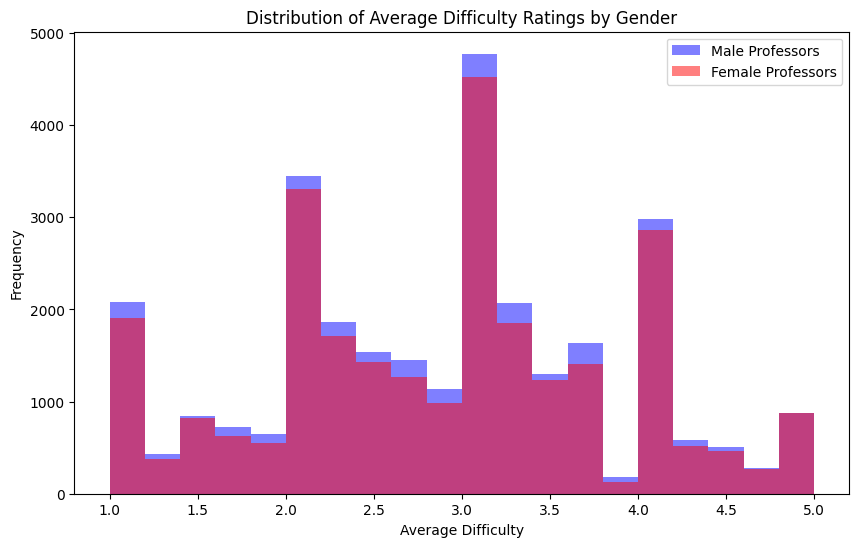

male_mean:  2.8384769880174288
female_mean:  2.843278797258457
male_std:  0.9894063646448855
female_std:  0.9943461485431558
t_stat:  -0.5749138290412293
p_value:  0.5653518816677128


In [66]:
# Removing rows with missing values in 'Average Difficulty' and gender columns
num_data_cleaned = num_data.dropna(subset=['Average Difficulty', 'Male Gender', 'Female Gender'])

# Extracting relevant columns
difficulty = num_data_cleaned['Average Difficulty']
male_gender = num_data_cleaned['Male Gender']
female_gender = num_data_cleaned['Female Gender']

# Splitting data by gender
male_difficulty = difficulty[male_gender == 1]
female_difficulty = difficulty[female_gender == 1]

# Performing t-test to check for significant difference
t_stat, p_value = ttest_ind(male_difficulty, female_difficulty, equal_var=False)

# Summary statistics
male_mean = np.mean(male_difficulty)
female_mean = np.mean(female_difficulty)
male_std = np.std(male_difficulty)
female_std = np.std(female_difficulty)

# Plotting distributions
plt.figure(figsize=(10, 6))
plt.hist(male_difficulty, bins=20, alpha=0.5, label='Male Professors', color='blue')
plt.hist(female_difficulty, bins=20, alpha=0.5, label='Female Professors', color='red')
plt.title('Distribution of Average Difficulty Ratings by Gender')
plt.xlabel('Average Difficulty')
plt.ylabel('Frequency')
plt.legend()
plt.show()

print("male_mean: ", male_mean)
print("female_mean: ",female_mean)
print("male_std: ", male_std)
print("female_std: ", female_std)
print("t_stat: ", t_stat)
print("p_value: ", p_value)

#solution for 6

In [67]:
from scipy.stats import t
from scipy.stats import norm

# Calculating the mean difference and confidence intervals for average ratings
ratings_cleaned = num_data.dropna(subset=['Average Rating', 'Male Gender', 'Female Gender'])
average_rating = ratings_cleaned['Average Rating']
male_ratings = average_rating[ratings_cleaned['Male Gender'] == 1]
female_ratings = average_rating[ratings_cleaned['Female Gender'] == 1]

# Calculating means and standard errors
male_mean_rating = np.mean(male_ratings)
female_mean_rating = np.mean(female_ratings)
mean_difference = male_mean_rating - female_mean_rating

male_std_rating = np.std(male_ratings, ddof=1)
female_std_rating = np.std(female_ratings, ddof=1)
n_male = len(male_ratings)
n_female = len(female_ratings)

# Standard error of the mean difference
se_diff = np.sqrt((male_std_rating**2 / n_male) + (female_std_rating**2 / n_female))

# Degrees of freedom for t-distribution
df = n_male + n_female - 2

# Calculate z-critical value for 95% confidence level
z_critical = norm.ppf(0.975) # 0.975 because 95% confidence (two-tailed)
# Calculate 95% confidence interval for the mean difference
ci_lower = mean_difference - z_critical * se_diff
ci_upper = mean_difference + z_critical * se_diff

# Output results
print("Male Mean Rating:", male_mean_rating)
print("Female Mean Rating:", female_mean_rating)
print("Mean Difference:", mean_difference)
print("z-critical value:", z_critical)
print("95% Confidence Interval using z-distribution: [{}, {}]".format(ci_lower, ci_upper))



Male Mean Rating: 3.8786968954248366
Female Mean Rating: 3.817403640651485
Mean Difference: 0.06129325477335179
z-critical value: 1.959963984540054
95% Confidence Interval using z-distribution: [0.04286554770706029, 0.07972096183964329]


In [68]:
# Re-import necessary libraries after reset
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Reload numerical data
num_data_path = '/content/rmpCapstoneNum.csv'
num_data = pd.read_csv(num_data_path)

# Renaming columns for `num_data`
num_data.columns = [
    'Average Rating',  # Column 1
    'Average Difficulty',  # Column 2
    'Number of Ratings',  # Column 3
    'Received Pepper',  # Column 4
    'Proportion Retake',  # Column 5
    'Ratings Online',  # Column 6
    'Male Gender',  # Column 7
    'Female Gender'  # Column 8
]

# Dropping rows with missing values in numerical predictors
num_data_cleaned = num_data.dropna()

# Defining predictors (independent variables) and target (dependent variable)
X = num_data_cleaned[['Average Difficulty', 'Number of Ratings', 'Received Pepper',
                      'Proportion Retake', 'Ratings Online', 'Male Gender', 'Female Gender']]
y = num_data_cleaned['Average Rating']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Calculating R-squared and RMSE
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Finding the strongest predictor based on regression coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

# Displaying results
print("R-squared:", r2)
print("Root Mean Squared Error (RMSE):", rmse)
print("\nregression coefficients:",coefficients )

R-squared: 0.802487252016088
Root Mean Squared Error (RMSE): 0.37169629079025684

regression coefficients:               Feature  Coefficient
2     Received Pepper     0.206856
0  Average Difficulty    -0.200870
5         Male Gender     0.046381
3   Proportion Retake     0.024906
6       Female Gender     0.023804
4      Ratings Online     0.001629
1   Number of Ratings    -0.000122


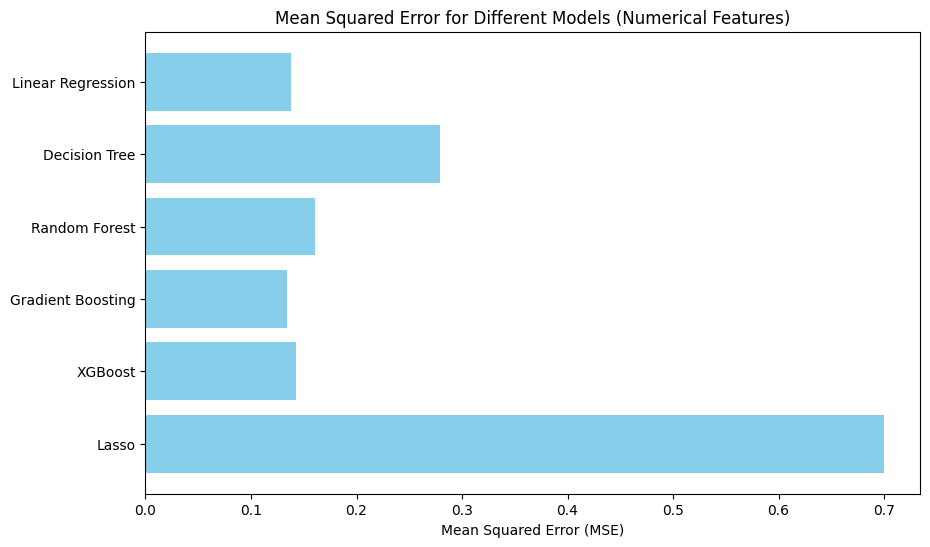

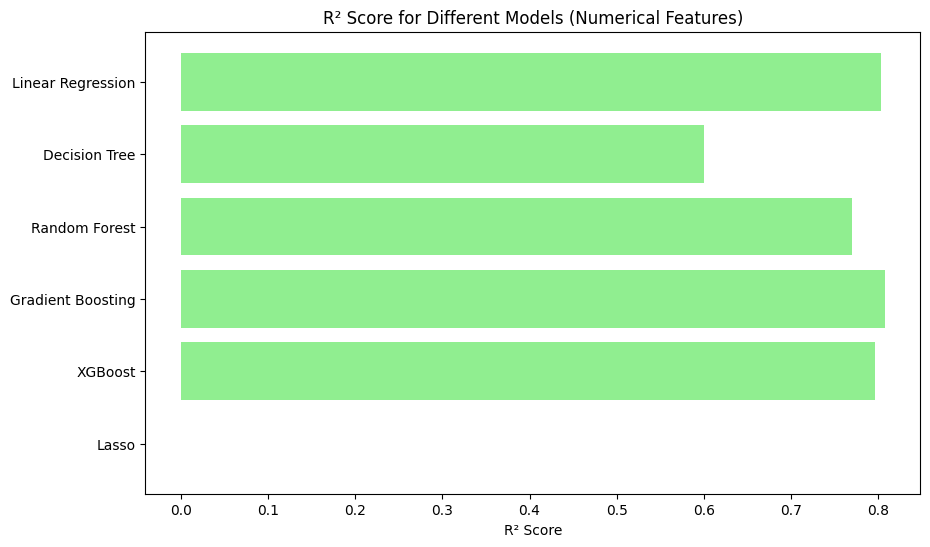

{'Linear Regression': {'MSE': 0.1381581325872352,
  'R² Score': 0.802487252016088},
 'Decision Tree': {'MSE': 0.2794161825228995, 'R² Score': 0.6005428199717053},
 'Random Forest': {'MSE': 0.16088664515169138, 'R² Score': 0.7699942609041961},
 'Gradient Boosting': {'MSE': 0.13439584992828255,
  'R² Score': 0.8078658625455315},
 'XGBoost': {'MSE': 0.14267040496365174, 'R² Score': 0.7960364459721138},
 'Lasso': {'MSE': 0.6994960934963913, 'R² Score': -9.142011583751497e-06}}

In [69]:
# Re-importing libraries after the environment reset
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Reloading numerical dataset for problem 7
num_data_path = '/content/rmpCapstoneNum.csv'
num_data = pd.read_csv(num_data_path)

# Renaming columns
num_data.columns = [
    'Average Rating', 'Average Difficulty', 'Number of Ratings',
    'Received Pepper', 'Proportion Retake', 'Ratings Online',
    'Male Gender', 'Female Gender'
]

# Dropping missing values
num_data_cleaned = num_data.dropna()

# Preparing numerical features (X) and target (y)
X_num = num_data_cleaned[['Average Difficulty', 'Number of Ratings', 'Received Pepper',
                          'Proportion Retake', 'Ratings Online', 'Male Gender', 'Female Gender']]
y_num = num_data_cleaned['Average Rating']

# Standardizing the features for models that are sensitive to scaling
scaler = StandardScaler()
X_scaled_num = scaler.fit_transform(X_num)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled_num, y_num, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'Lasso': Lasso(random_state=42),
}

# Step 3: Fit and evaluate each model
evaluation_results_num = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store the evaluation metrics
    evaluation_results_num[model_name] = {
        'MSE': mse,
        'R² Score': r2
    }

# Extracting the model names and their evaluation metrics for plotting
model_names_num = list(evaluation_results_num.keys())
mse_values_num = [evaluation_results_num[model]['MSE'] for model in model_names_num]
r2_values_num = [evaluation_results_num[model]['R² Score'] for model in model_names_num]

# Plotting MSE for each model
plt.figure(figsize=(10, 6))
plt.barh(model_names_num, mse_values_num, color='skyblue')
plt.xlabel("Mean Squared Error (MSE)")
plt.title("Mean Squared Error for Different Models (Numerical Features)")
plt.gca().invert_yaxis()  # Invert the axis to have the best performer on top
plt.show()

# Plotting R² Score for each model
plt.figure(figsize=(10, 6))
plt.barh(model_names_num, r2_values_num, color='lightgreen')
plt.xlabel("R² Score")
plt.title("R² Score for Different Models (Numerical Features)")
plt.gca().invert_yaxis()  # Invert the axis to have the best performer on top
plt.show()

evaluation_results_num


Top features:
              Feature  Importance
3   Proportion Retake    0.622917
0  Average Difficulty    0.148317
2     Received Pepper    0.103188
5         Male Gender    0.022973
6       Female Gender    0.011398


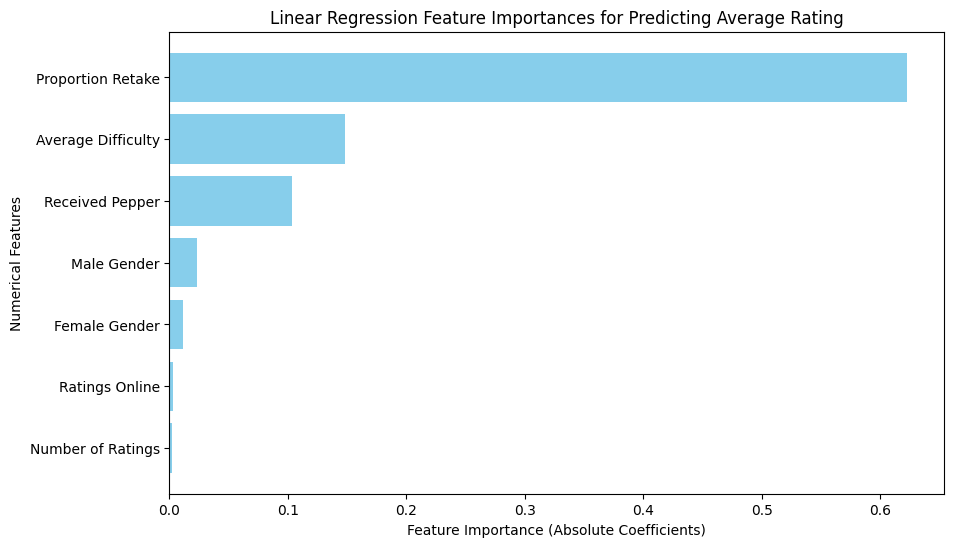

In [70]:
# Train the Linear Regression model explicitly
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Extract coefficients (acts as feature importance in linear regression)
coefficients = linear_model.coef_

# Map coefficients to feature names
importance_df = pd.DataFrame({
    'Feature': X_num.columns,  # Use the feature names
    'Importance': np.abs(coefficients)  # Absolute value of coefficients
}).sort_values(by='Importance', ascending=False)

# Display the most important features
print("Top features:")
print(importance_df.head())

# Plotting the feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance (Absolute Coefficients)')
plt.ylabel('Numerical Features')
plt.title('Linear Regression Feature Importances for Predicting Average Rating')
plt.gca().invert_yaxis()  # Best predictors on top
plt.show()

#SOLUTION FOR 8

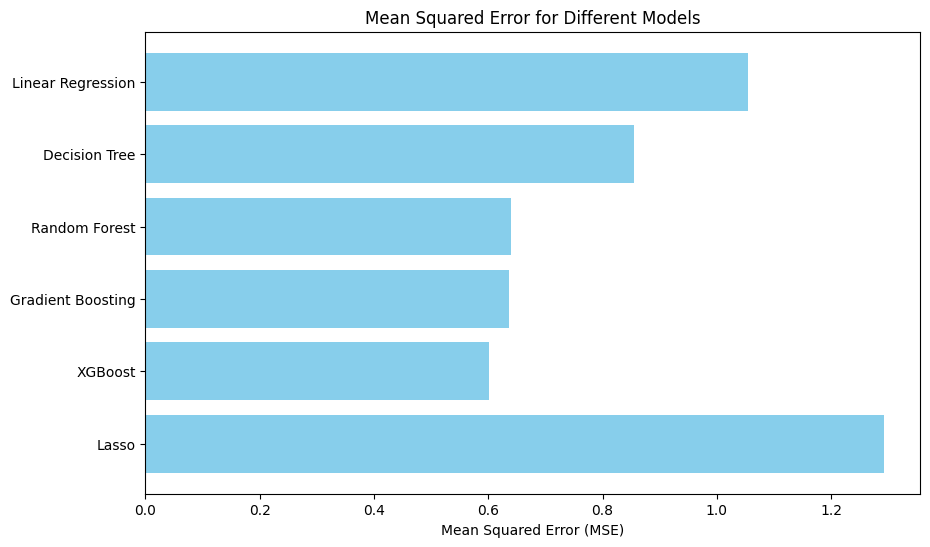

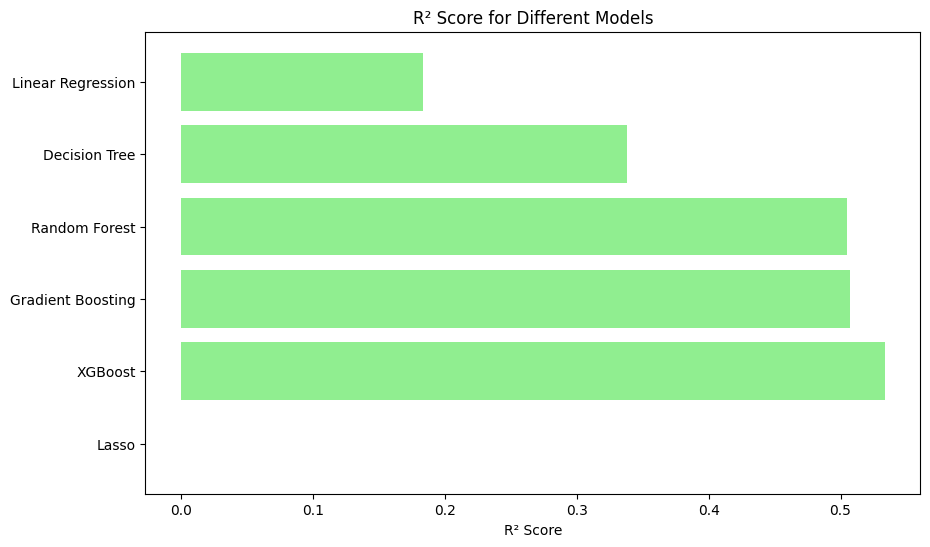

{'Linear Regression': {'MSE': 1.0545276146710623,
  'R² Score': 0.18360538047968022},
 'Decision Tree': {'MSE': 0.8551163720705535, 'R² Score': 0.33798565773936873},
 'Random Forest': {'MSE': 0.63991007879577, 'R² Score': 0.5045941537826412},
 'Gradient Boosting': {'MSE': 0.6368148721795096,
  'R² Score': 0.5069904021052676},
 'XGBoost': {'MSE': 0.6020684206837348, 'R² Score': 0.5338904241188425},
 'Lasso': {'MSE': 1.2918189060839875, 'R² Score': -0.0001008884443141067}}

In [78]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd

# Loading tags and numerical datasets
tags_data_path = '/content/rmpCapstoneTags.csv'
num_data_path = '/content/rmpCapstoneNum.csv'

tags_data = pd.read_csv(tags_data_path)
num_data = pd.read_csv(num_data_path)

# Renaming columns
tags_data.columns = [
    'Tough Grader', 'Good Feedback', 'Respected', 'Lots to Read',
    'Participation Matters', 'Don’t Skip Class', 'Lots of Homework',
    'Inspirational', 'Pop Quizzes!', 'Accessible', 'So Many Papers',
    'Clear Grading', 'Hilarious', 'Test Heavy', 'Graded by Few Things',
    'Amazing Lectures', 'Caring', 'Extra Credit', 'Group Projects',
    'Lecture Heavy'
]

num_data.columns = [
    'Average Rating', 'Average Difficulty', 'Number of Ratings',
    'Received Pepper', 'Proportion Retake', 'Ratings Online',
    'Male Gender', 'Female Gender'
]

# Merging the datasets
combined_data = pd.concat([num_data[['Average Rating']], tags_data], axis=1).dropna()

# Preparing features and target
X_tags = combined_data.iloc[:, 1:]  # All tag columns as features
y_tags = combined_data['Average Rating']  # Average Rating as the target

# Standardizing the features for models that are sensitive to scaling
scaler = StandardScaler()
X_scaled_tags = scaler.fit_transform(X_tags)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled_tags, y_tags, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'Lasso': Lasso(random_state=42),
}

# Step 3: Fit and evaluate each model
evaluation_results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store the evaluation metrics
    evaluation_results[model_name] = {
        'MSE': mse,
        'R² Score': r2
    }

# Extracting the model names and their evaluation metrics for plotting
model_names = list(evaluation_results.keys())
mse_values = [evaluation_results[model]['MSE'] for model in model_names]
r2_values = [evaluation_results[model]['R² Score'] for model in model_names]

# Plotting MSE for each model
plt.figure(figsize=(10, 6))
plt.barh(model_names, mse_values, color='skyblue')
plt.xlabel("Mean Squared Error (MSE)")
plt.title("Mean Squared Error for Different Models")
plt.gca().invert_yaxis()  # Invert the axis to have the best performer on top
plt.show()

# Plotting R² Score for each model
plt.figure(figsize=(10, 6))
plt.barh(model_names, r2_values, color='lightgreen')
plt.xlabel("R² Score")
plt.title("R² Score for Different Models")
plt.gca().invert_yaxis()  # Invert the axis to have the best performer on top
plt.show()

# Displaying evaluation results
evaluation_results


Top features:
             Feature  Importance
0       Tough Grader    0.199040
1      Good Feedback    0.185451
2          Respected    0.148509
16            Caring    0.088610
15  Amazing Lectures    0.074769


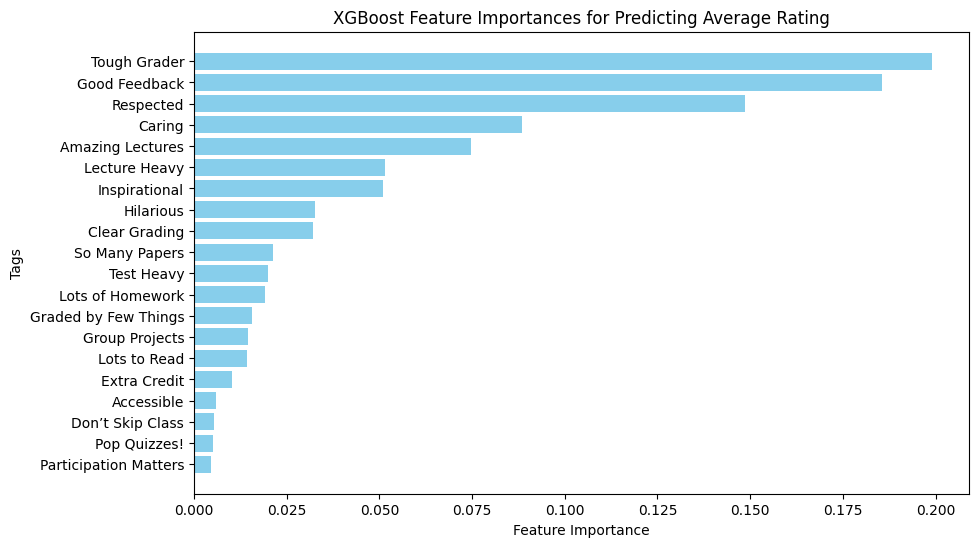

In [79]:
# Train the XGBoost model explicitly
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Extract feature importances from the trained XGBoost model
feature_importances = xgb_model.feature_importances_

# Map feature importances to tag names
importance_df = pd.DataFrame({
    'Feature': X_tags.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the most important features
print("Top features:")
print(importance_df.head())

# Plotting the feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Tags')
plt.title('XGBoost Feature Importances for Predicting Average Rating')
plt.gca().invert_yaxis()  # Best predictors on top
plt.show()
